In [75]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as rfr
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df = pd.read_csv('ffinalcar.csv')

In [4]:
df = df.iloc[:,2:]

In [7]:
df = df.iloc[:-1,:] #현대차 7천원도 말이안되서 제거

In [11]:
df = df[df['Price']<245000] # 레인지로버 2억5 천 이상치로 판단하여 제거

In [17]:
df['Year'] = df['Year'].astype('object')
df['Seats'] = df['Seats'].astype('object')

/tmp/ipykernel_15650/46906376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('object')
/tmp/ipykernel_15650/46906376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seats'] = df['Seats'].astype('object')


In [19]:
def change_e(x):
    y = float(x.split()[0])
    return y

def change_m(x):
    y = float(x.split('k')[0])
    return y

df['Mileage'] = df['Mileage'].apply(change_m)
df['Engine'] = df['Engine'].apply(change_e)

/tmp/ipykernel_15650/390568064.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].apply(change_m)
/tmp/ipykernel_15650/390568064.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Engine'] = df['Engine'].apply(change_e)


In [74]:
df.head()

,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,n_price
0,2682.68,12,0.153496,0,1,0,1.970704,-1.032654,2,-0.796355
1,19162.00,17,-0.190522,1,1,0,0.314046,-0.062138,2,0.006165
2,6898.32,13,-0.135035,4,1,0,-0.037366,-0.698624,2,-0.606452
3,9197.76,14,0.319956,1,1,0,0.577008,-0.617193,4,-0.446891
4,27194.71,15,-0.194184,1,0,2,-0.754535,0.579333,2,1.649751


In [22]:
a = df.select_dtypes(exclude= 'object').columns.to_list()[1:]
scaler = StandardScaler()
df.loc[:,a] = scaler.fit_transform(df.loc[:,a])

/tmp/ipykernel_15650/1656182388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,a] = scaler.fit_transform(df.loc[:,a])


In [25]:
b = df.select_dtypes(include = 'object').columns.to_list()
encoder = LabelEncoder()
df.loc[:,b] = df.loc[:,b].apply(encoder.fit_transform)

/tmp/ipykernel_15650/885696430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,b] = df.loc[:,b].apply(encoder.fit_transform)
/tmp/ipykernel_15650/885696430.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,b] = df.loc[:,b].apply(encoder.fit_transform)


In [56]:
n_pr_list = []
n_pr_list.extend(df['n_price'])
n_poly_price = np.reshape(n_pr_list,(-1,1))

In [68]:
poly = PolynomialFeatures(degree=3 , include_bias=False)

In [69]:
poly_price = poly.fit_transform(n_poly_price)

In [70]:
poly_pr = pd.DataFrame(poly_price,columns=['price_1' , 'price_2' ,'price_3'])

In [71]:
poly_pr

,price_1,price_2,price_3
0,-0.796355,0.634181,-5.050328e-01
1,0.006165,0.000038,2.343363e-07
2,-0.606452,0.367784,-2.230437e-01
3,-0.446891,0.199712,-8.924933e-02
4,1.649751,2.721678,4.490092e+00
...,...,...,...
6193,-0.597863,0.357440,-2.137005e-01
6194,-0.624224,0.389656,-2.432324e-01
6195,-0.243686,0.059383,-1.447079e-02
6196,0.212897,0.045325,9.649522e-03


4254.912047365003
8305.722084172112
0.7729669775758635
0.7670713056323791


<Axes: ylabel='Price'>

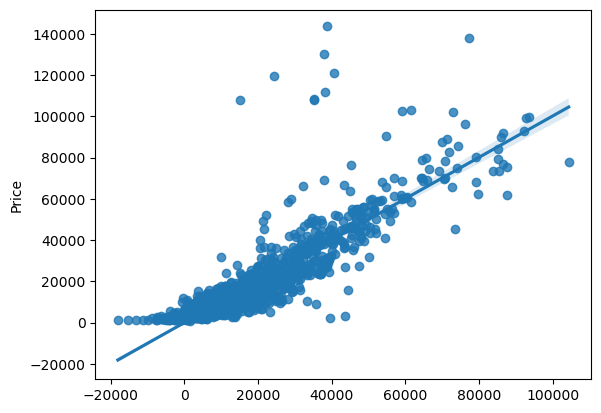

In [72]:
df = df.reset_index(drop=True)
df_y = df['Price']
df_x = df.drop('Price' , axis=1)
df_x = pd.concat([df_x,poly_pr],axis=1)

idx = [ i for i in range(len(df))]
train_idx , test_idx = train_test_split(idx,test_size=0.3 ,shuffle= True , random_state= 2024)
tr_x = df_x.loc[train_idx] ; te_x = df_x.loc[test_idx] 
tr_y = df_y.loc[train_idx] ; te_y = df_y.loc[test_idx]

lr_model = LinearRegression().fit(tr_x,tr_y)
pred = lr_model.predict(te_x)
print(mean_absolute_error(te_y,pred))
print(np.sqrt(mean_squared_error(te_y,pred)))
print(r2_score(te_y,pred))
print(lr_model.score(tr_x,tr_y))
sns.regplot(y=te_y,x=pred)

In [76]:
rfr_model = rfr(random_state=2024)
params ={'n_estimators':[50,100,150], 'min_samples_leaf':[30,50,100,120] , 'min_samples_split' : [30,50,100,120] , 'max_depth':[5,7,10]}
rfr_grid = GridSearchCV(rfr_model,params,scoring='r2',n_jobs=-1).fit(tr_x,tr_y)
print(rfr_grid.best_estimator_)

RandomForestRegressor(max_depth=10, min_samples_leaf=30, min_samples_split=30,
                      n_estimators=150, random_state=2024)


2872.2503181952
7216.72112093527
0.8285987099146277
0.7670713056323791


<Axes: ylabel='Price'>

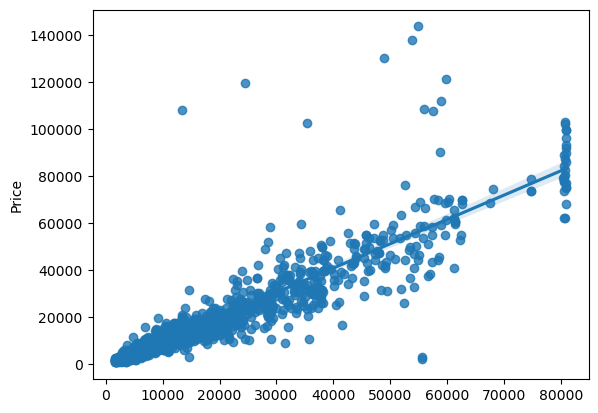

In [77]:
rfr_model = rfr(max_depth=10, min_samples_leaf=30, min_samples_split=30,n_estimators = 150,random_state=2024).fit(tr_x,tr_y)
pred = rfr_model.predict(te_x)
print(mean_absolute_error(te_y,pred))
print(np.sqrt(mean_squared_error(te_y,pred)))
print(r2_score(te_y,pred))
print(lr_model.score(tr_x,tr_y))
sns.regplot(y=te_y,x=pred)

([<matplotlib.axis.YTick at 0x7fb1ca6101c0>,
 [Text(0, 0, 'Fuel_Type'),
  Text(0, 1, 'Owner_Type'),
  Text(0, 2, 'Seats'),
  Text(0, 3, 'Mileage'),
  Text(0, 4, 'Transmission'),
  Text(0, 5, 'Kilometers_Driven'),
  Text(0, 6, 'Year'),
  Text(0, 7, 'Engine'),
  Text(0, 8, 'n_price')])

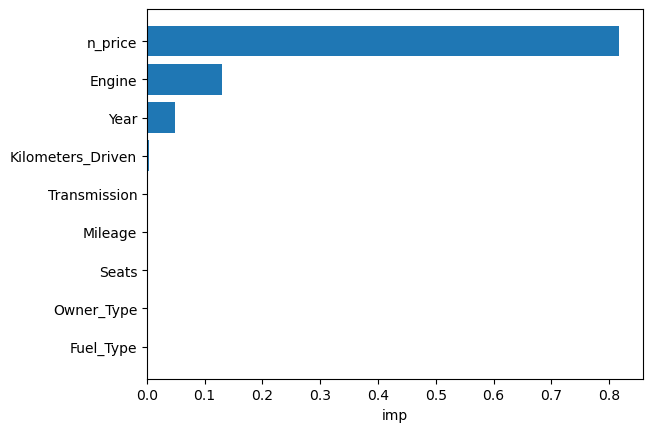

In [51]:
rfr_df = pd.DataFrame()
rfr_df['feature'] = tr_x.columns
rfr_df['imp'] = rfr_model.feature_importances_
rfr_df.sort_values('imp',ascending=True , inplace=True)

xlabel = [i for i in range(len(tr_x.columns))]
plt.barh(y = xlabel , width= rfr_df['imp'])
plt.xlabel('imp')
plt.yticks(xlabel , rfr_df['feature'])

In [79]:
gb_model = GradientBoostingRegressor(random_state=2024)
params ={'learning_rate':[0.1,0.15,0.2],'n_estimators':[50,100,150], 'min_samples_leaf':[30,50,100] , 'min_samples_split' : [30,50,100] , 'max_depth':[5,7,10]}
gb_grid = GridSearchCV(gb_model , params , scoring='r2',n_jobs=-1).fit(tr_x,tr_y)
print(gb_grid.best_estimator_)

KeyboardInterrupt: 